In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pwd

Mounted at /content/drive
/content


In [ ]:
!ls
%cd drive/MyDrive/DA/clustering
!pwd

drive  sample_data
/content/drive/.shortcut-targets-by-id/16BzENDslJoHpb3XlZqeoy64RYYEZ8ltp/clustering
/content/drive/.shortcut-targets-by-id/16BzENDslJoHpb3XlZqeoy64RYYEZ8ltp/clustering


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from math import pi
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler
from sklearn.ensemble import IsolationForest
import seaborn as sn
import math
import collections

###Load dataset

In [ ]:
df_data_org = pd.read_csv('football_data.csv', na_values=np.NaN)
print(df_data_org.shape)
display(df_data_org.head())
display(df_data_org.info())
display(df_data_org.describe())

(18207, 89)


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

None

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [ ]:
df_data_pro_names = pd.read_csv('processed_football_data_with_names.csv', na_values=np.NaN)
print(df_data_pro_names.shape)
display(df_data_pro_names.head())
display(df_data_pro_names.info())
display(df_data_pro_names.describe())

(18147, 79)


,Name,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate
0,L. Messi,31,94,94,110.5,565.0,2202,0,5.0,4.0,4.0,1,1,10.0,5.7,159,88.0,88.0,88.0,92.0,93.0,93.0,93.0,92.0,93.0,93.0,93.0,91.0,84.0,84.0,84.0,91.0,64.0,61.0,61.0,61.0,64.0,59.0,47.0,47.0,47.0,59.0,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5,1,1
1,Cristiano Ronaldo,33,94,94,77.0,405.0,2228,1,5.0,4.0,5.0,1,1,7.0,6.2,183,91.0,91.0,91.0,89.0,90.0,90.0,90.0,89.0,88.0,88.0,88.0,88.0,81.0,81.0,81.0,88.0,65.0,61.0,61.0,61.0,65.0,61.0,53.0,53.0,53.0,61.0,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127.1,2,0
2,Neymar Jr,26,92,93,118.5,290.0,2143,1,5.0,5.0,5.0,1,1,10.0,5.9,150,84.0,84.0,84.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,89.0,88.0,81.0,81.0,81.0,88.0,65.0,60.0,60.0,60.0,65.0,60.0,47.0,47.0,47.0,60.0,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1,2,1
3,De Gea,27,91,93,72.0,260.0,1471,1,4.0,3.0,1.0,0,1,1.0,6.4,168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138.6,1,1
4,K. De Bruyne,27,91,92,102.0,355.0,2281,1,4.0,5.0,4.0,1,1,7.0,5.1,154,82.0,82.0,82.0,87.0,87.0,87.0,87.0,87.0,88.0,88.0,88.0,88.0,87.0,87.0,87.0,88.0,77.0,77.0,77.0,77.0,77.0,73.0,66.0,66.0,66.0,73.0,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4,2,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 79 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18147 non-null  object 
 1   Age                       18147 non-null  int64  
 2   Overall                   18147 non-null  int64  
 3   Potential                 18147 non-null  int64  
 4   Value                     18147 non-null  float64
 5   Wage                      18147 non-null  float64
 6   Special                   18147 non-null  int64  
 7   Preferred Foot            18147 non-null  int64  
 8   International Reputation  18147 non-null  float64
 9   Weak Foot                 18147 non-null  float64
 10  Skill Moves               18147 non-null  float64
 11  Body Type                 18147 non-null  int64  
 12  Real Face                 18147 non-null  int64  
 13  Jersey Number             18147 non-null  float64
 14  Height

None

,Age,Overall,Potential,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Body Type,Real Face,Jersey Number,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,Attack Work Rate,Defense Work Rate
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,25.121122,66.253926,71.324076,264.965851,9.759024,1598.002645,0.768061,1.113297,2.947154,2.361492,0.709484,0.091145,19.546096,5.796225,165.982972,51.363917,51.363917,51.363917,52.449716,52.166970,52.166970,52.166970,52.449716,52.401278,52.401278,52.401278,53.068992,51.724087,51.724087,51.724087,53.068992,51.095443,50.484102,50.484102,50.484102,51.095443,50.467791,49.408663,49.408663,49.408663,50.467791,49.738414,45.550229,52.300766,58.695432,42.912217,55.375158,47.176283,42.866038,52.721386,58.374828,64.612829,64.726236,63.501295,61.839147,63.964292,55.465201,65.091034,63.221579,65.318620,47.113187,55.876068,46.702761,49.962198,53.407781,48.546371,58.651127,47.286053,47.701879,45.666336,16.616906,16.393839,16.233041,16.389651,16.712019,209.288246,1.218218,1.086185
std,4.669796,6.913320,6.132286,289.865229,22.030250,272.882706,0.422082,0.394150,0.660498,0.756274,0.576000,0.287822,15.947765,0.450096,15.593388,20.127113,20.127113,20.127113,20.782694,20.676314,20.676314,20.676314,20.782694,20.720793,20.720793,20.720793,20.723790,20.113570,20.113570,20.113570,20.723790,19.980009,20.253241,20.253241,20.253241,19.980009,20.009639,20.695756,20.695756,20.695756,20.009639,18.364255,19.527445,17.381753,14.696075,17.695900,18.912224,18.396009,17.480034,15.325211,16.685643,14.930320,14.651776,14.768956,9.011056,14.136073,17.235534,11.822327,15.896381,12.552479,19.263142,17.366534,20.697462,19.530469,14.146594,15.703113,11.437138,19.900450,21.663630,21.287961,17.698612,16.909971,16.504103,17.037031,17.957521,293.407285,0.521755,0.502896
min,16.000000,46.000000,48.000000,0.000000,0.000000,731.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,5.100000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,4.400000,1.000000,

In [ ]:
df_data_pro = df_data_pro_names.drop(['Name'],axis=1)

#Plot histograms of count of players on the basis of some attributes like height

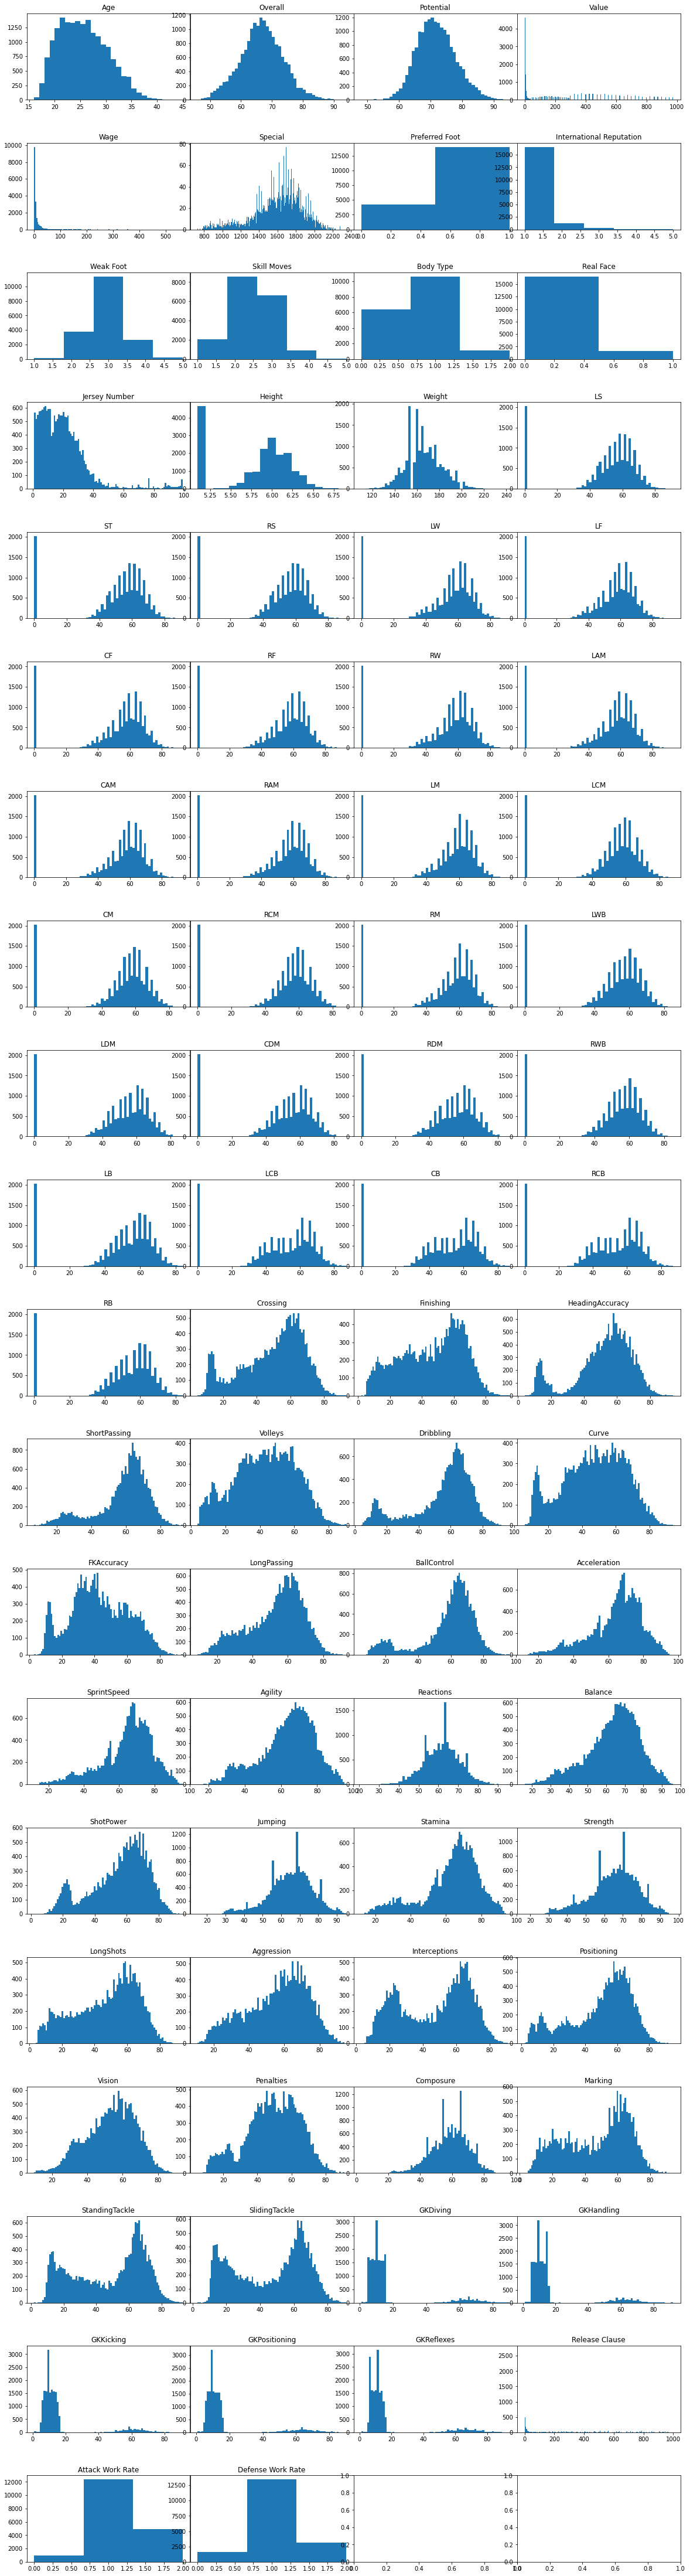

In [ ]:
fig, axes = plt.subplots(20, 4, figsize=(20,80))
fig.subplots_adjust(hspace = .5, wspace=.001)
for ax, col in zip(axes.ravel(),df_data_pro.columns):
    bins = len(df_data_pro[col].unique())
    # print(col,bins)
    ax.hist(df_data_pro[col],bins)
    ax.set_title(col)

#Distribution of players in different clubs/country on the basis of some attribute.

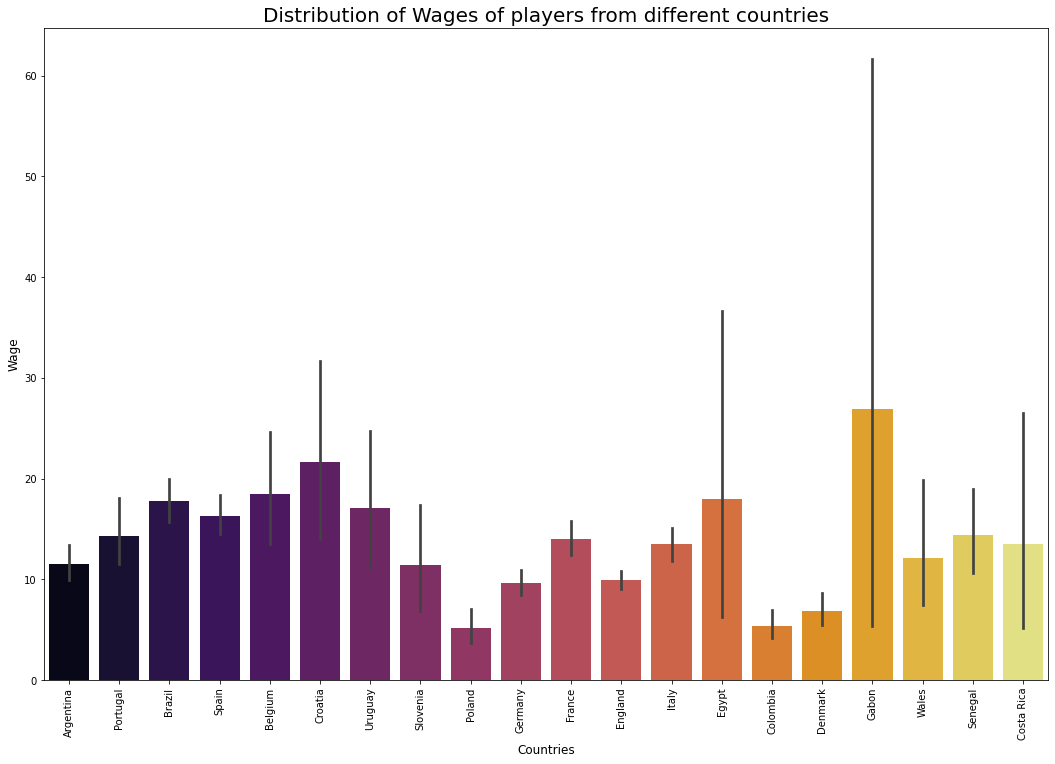

In [ ]:
df_data_org['Wage'] = df_data_org['Wage'].apply(lambda c: float(c[1:-1]) if (pd.notnull(c) and (c[-1]=='M' or c[-1]=='K')) else np.NaN)
df_data_org['Wage'].fillna(df_data_org['Wage'].median(), inplace = True)
some_countries = df_data_org['Nationality'].unique()[:20]
data_countries = df_data_org.loc[df_data_org['Nationality'].isin(some_countries) & df_data_org['Wage']]

plt.rcParams['figure.figsize'] = (18, 12)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Wage'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Wage', fontsize = 12)
ax.set_title(label = 'Distribution of Wages of players from different countries', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()


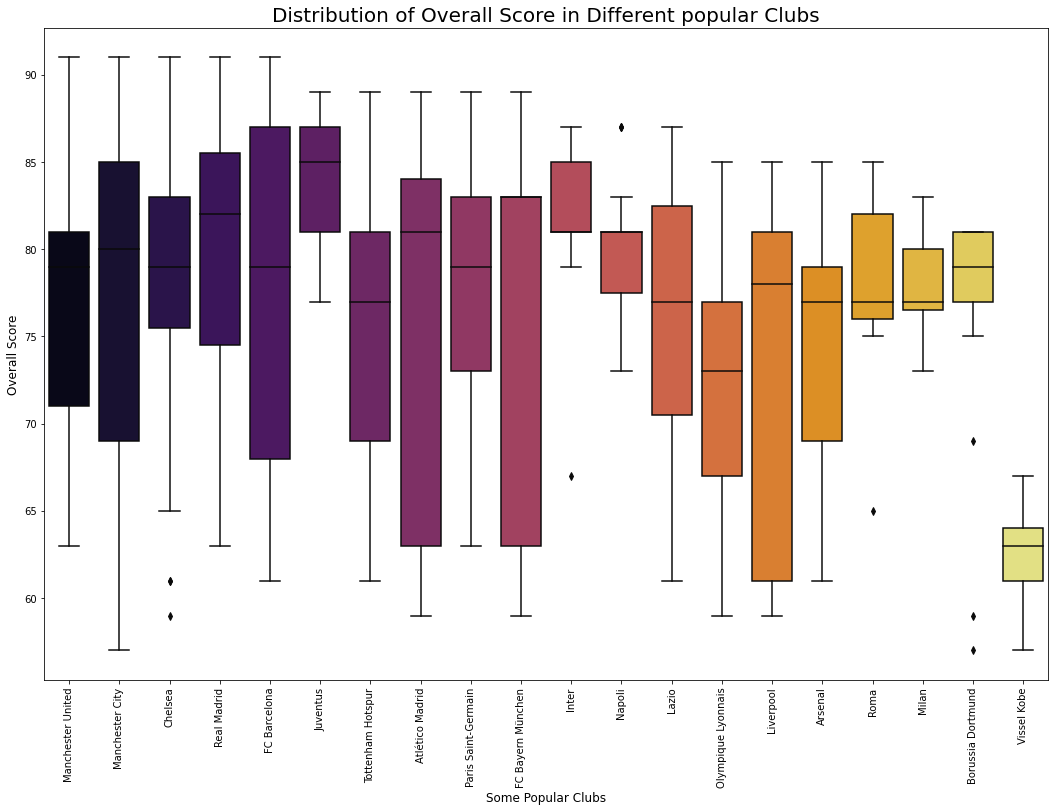

In [ ]:
some_clubs = df_data_org['Club'].unique()[:20]

data_clubs = df_data_org.loc[df_data_org['Club'].isin(some_clubs) & df_data_org['Overall']]

plt.rcParams['figure.figsize'] = (18, 12)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno')
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 12)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 12)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

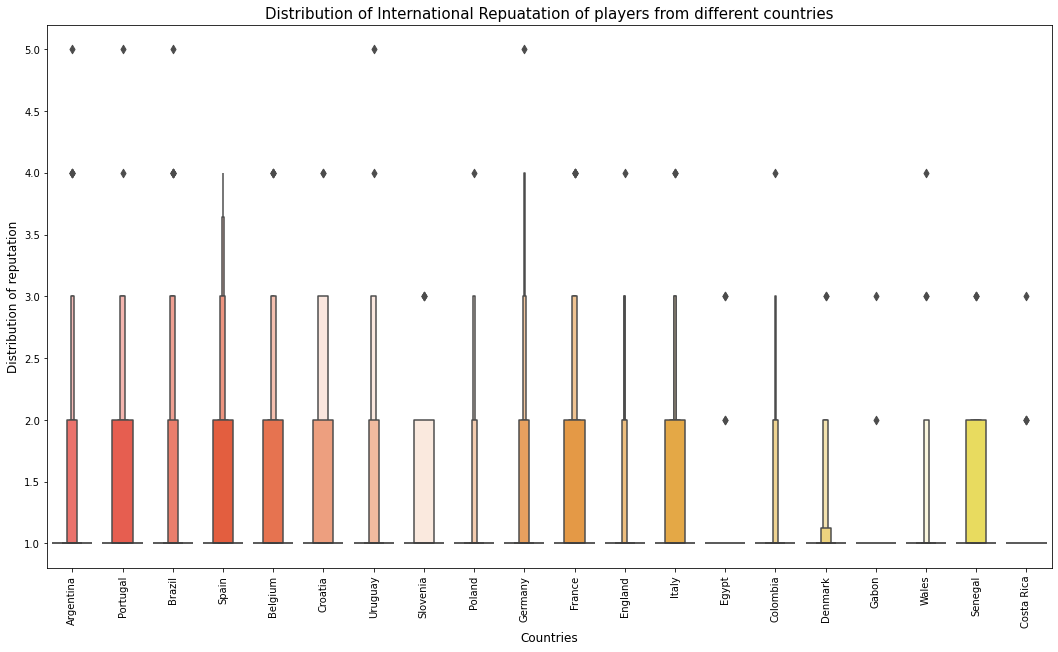

In [ ]:
# some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia')
data_countries = df_data_org.loc[df_data_org['Nationality'].isin(some_countries) & df_data_org['International Reputation']]

plt.rcParams['figure.figsize'] = (18, 10)
ax = sns.boxenplot(x = data_countries['Nationality'], y = data_countries['International Reputation'], palette = 'autumn')
ax.set_xlabel(xlabel = 'Countries', fontsize = 12)
ax.set_ylabel(ylabel = 'Distribution of reputation', fontsize = 12)
ax.set_title(label = 'Distribution of International Repuatation of players from different countries', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

#Features of players according to their position

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


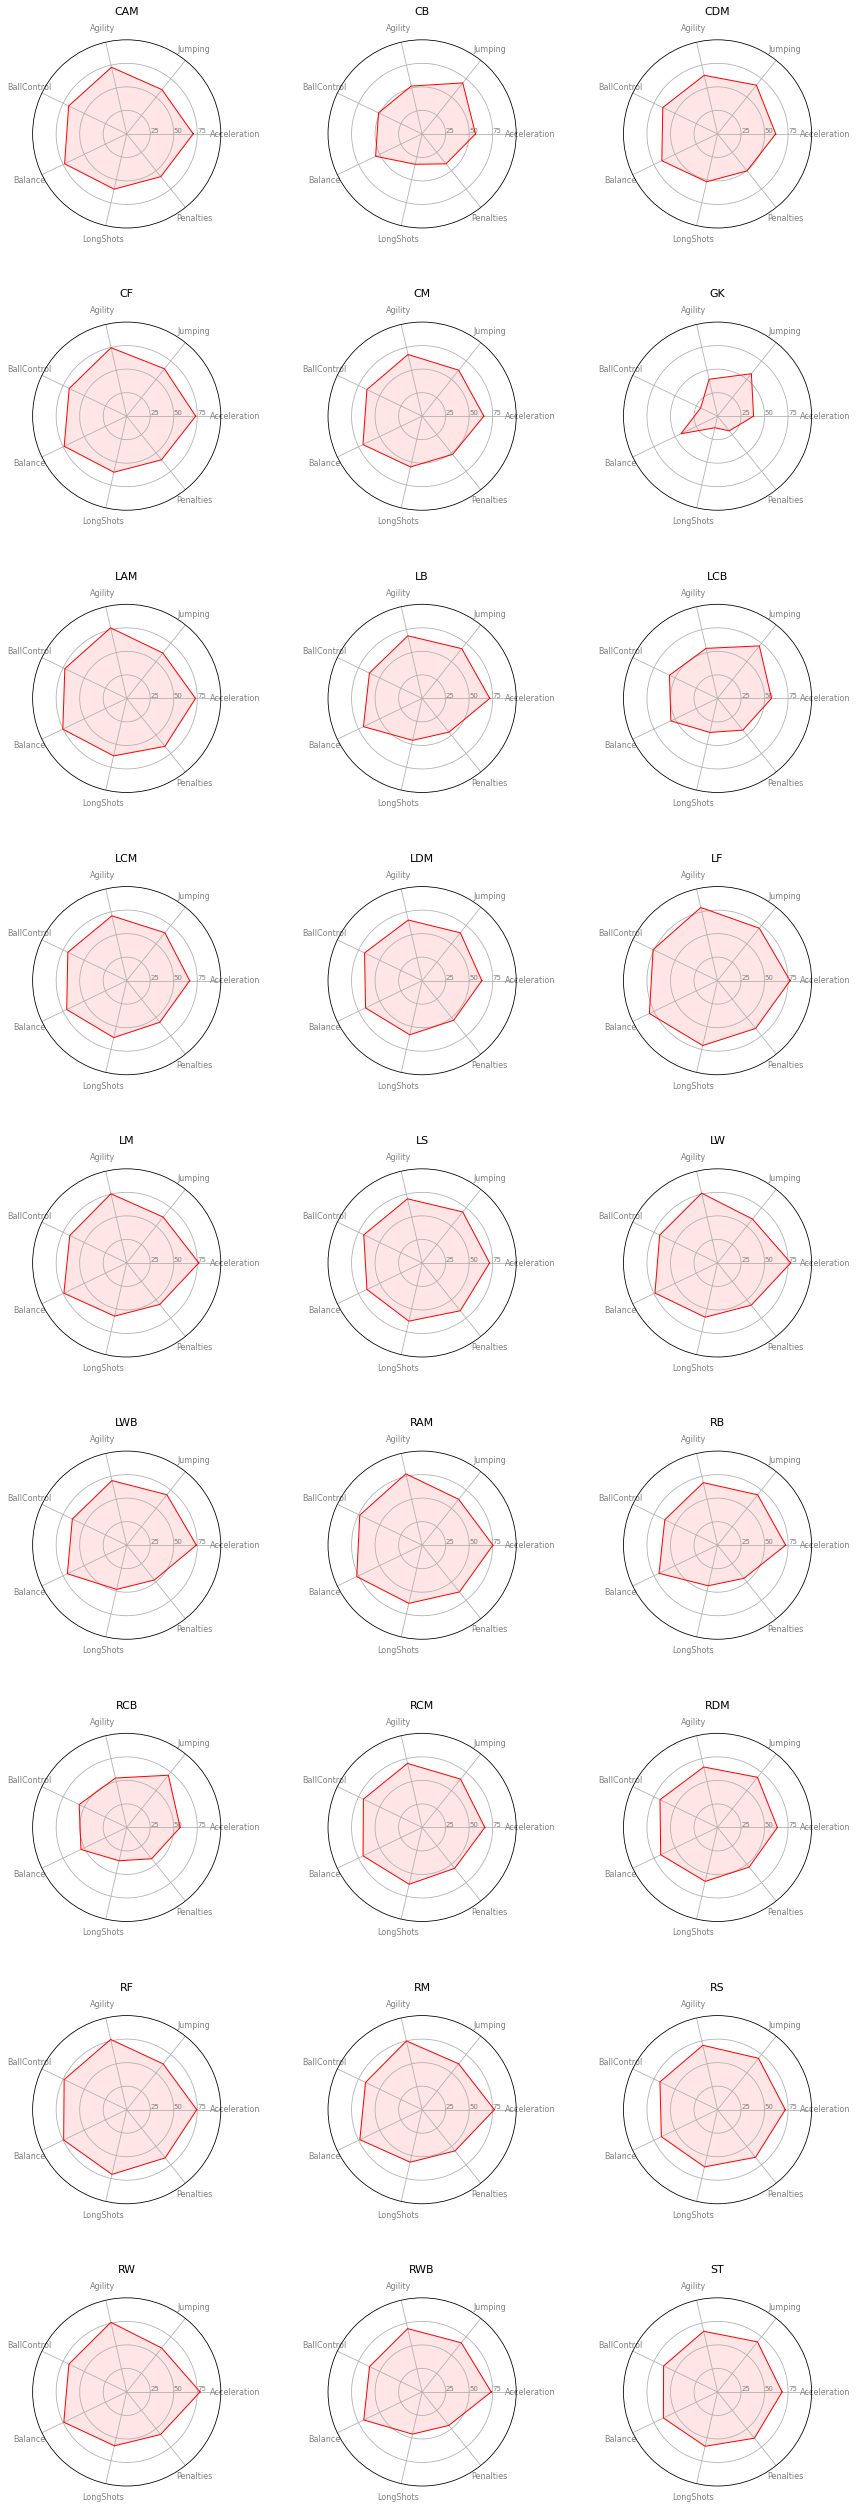

In [ ]:
player_features = ('Acceleration', 'Jumping', 'Agility','BallControl', 'Balance', 'LongShots', 'Penalties')
colors = ['b', 'r', 'g', 'm', 'y', 'k']

idx = 1
plt.figure(figsize=(15,45))
for position_name, features in df_data_org.groupby(df_data_org['Position'])[player_features].mean().iterrows():
    features = dict(features)
    categories=features.keys()
    N = len(categories)
    values = list(features.values())
    values += values[:1]
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(9, 3, idx, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)
    plt.subplots_adjust(hspace = 0.5)
    ax.plot(angles, values, linewidth=1, linestyle='solid', color='r')
    ax.fill(angles, values, 'b', alpha=0.1, facecolor='r')    
    plt.title(position_name, size=11, y=1.1)
    idx += 1 

#Other Visualizations

###TSNE for original data

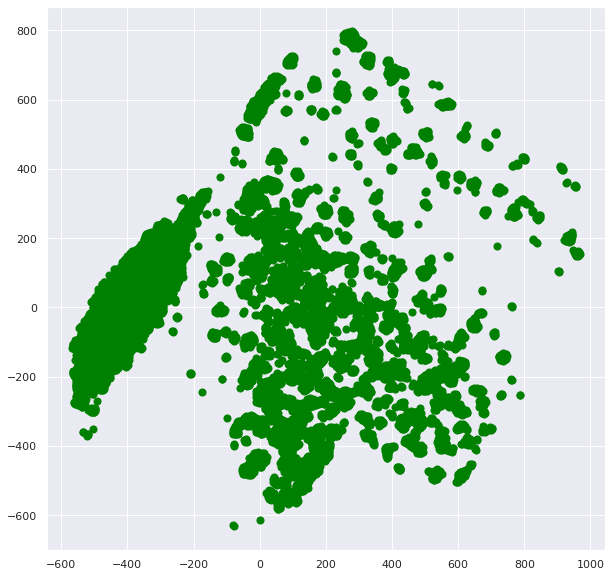

In [ ]:
tsneagg = TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(df_data_pro.values)
fig=plt.figure(figsize=(10,10))
plt.scatter(tsneagg[:,0], tsneagg[:,1], s=50, marker='o', color='green')

###TSNE for normalized data

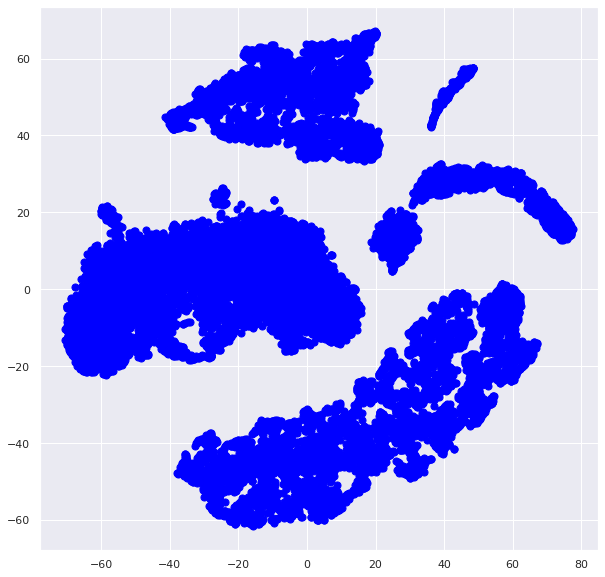

In [ ]:
data_norm = normalize(df_data_pro.values)
tsneagg = TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(data_norm)
fig=plt.figure(figsize=(10,10))
plt.scatter(tsneagg[:,0], tsneagg[:,1], s=50, marker='o', color='blue')

###TSNE for Standard-scaled data

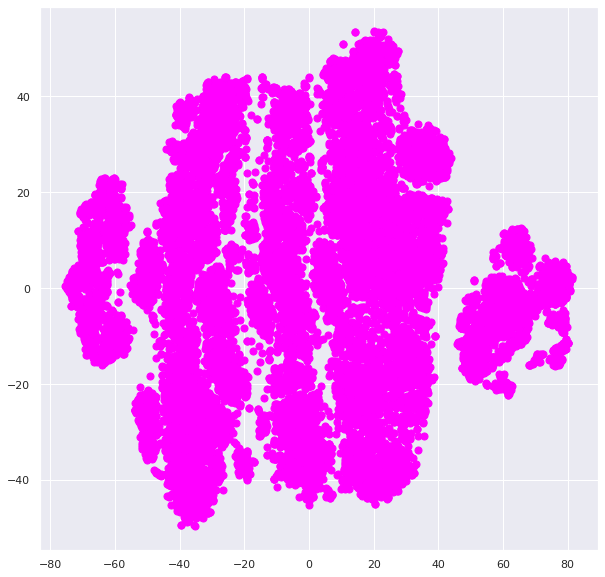

In [ ]:
scaler = StandardScaler()
data_scale = scaler.fit_transform(df_data_pro.values)
tsneagg = TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(data_scale)
fig=plt.figure(figsize=(10,10))
plt.scatter(tsneagg[:,0], tsneagg[:,1], s=50, marker='o', color='magenta')


###TSNE for Min-max-scaled data

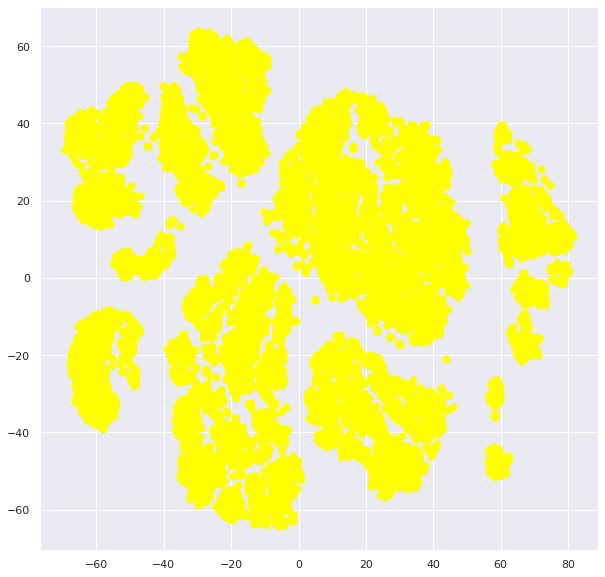

In [ ]:
mxscaler = MinMaxScaler()
data_mxscale = mxscaler.fit_transform(df_data_pro.values)
tsneagg = TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(data_mxscale)
fig=plt.figure(figsize=(10,10))
plt.scatter(tsneagg[:,0], tsneagg[:,1], s=50, marker='o', color='yellow')


#Finding and Removing Outliers (from multi-dimensional data)

###Finding outliers using Isolation Forest

In [ ]:
iso = IsolationForest(contamination=0.002)
yhat = iso.fit_predict(df_data_pro.values)
print(yhat.shape)
print(yhat)
counts = collections.Counter(yhat)
print(counts)
mask = yhat == -1
outliers = df_data_pro_names['Name'][mask]
print(outliers)

(18147,)
[-1 -1 -1 ...  1  1  1]
Counter({1: 18110, -1: 37})
0                 L. Messi
1        Cristiano Ronaldo
2                Neymar Jr
3                   De Gea
4             K. De Bruyne
5                E. Hazard
6                L. Modrić
7                L. Suárez
9                 J. Oblak
13             David Silva
15               P. Dybala
17            A. Griezmann
18           M. ter Stegen
19             T. Courtois
22                M. Neuer
23               S. Agüero
28            J. Rodríguez
31              C. Eriksen
32                Coutinho
35                 Marcelo
36                 G. Bale
37               H. Lloris
41               G. Buffon
45                P. Pogba
53              I. Rakitić
57                 Ederson
68                 M. Reus
81                 Alisson
96                A. Vidal
101          R. Nainggolan
126               A. Lopes
149          K. Schmeichel
177                   Kepa
180            J. Pickford
871               C. 

###Plotting outliers

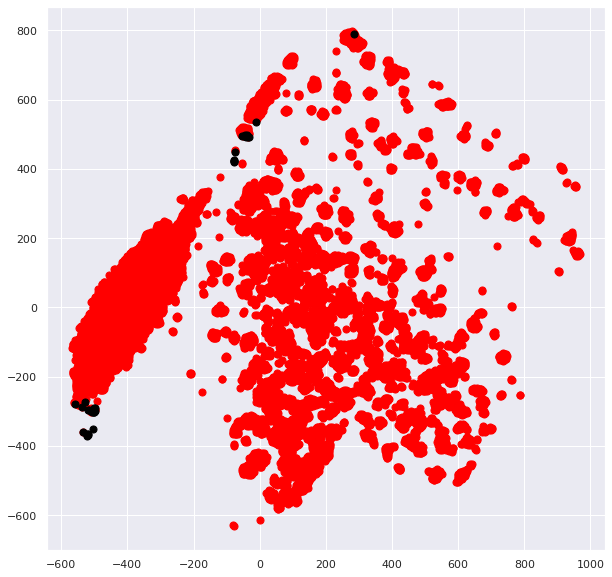

In [ ]:
tsneagg=TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(df_data_pro.values)
fig=plt.figure(figsize=(10,10))

plt.scatter(tsneagg[yhat==1, 0], tsneagg[yhat==1, 1], s=50, marker='o', color='red')
plt.scatter(tsneagg[yhat==-1, 0], tsneagg[yhat==-1, 1], s=50, marker='o', color='black')

#### Other techniques for finding and removing outliers from multi-dimensional data : DBSCAN, One-class SVM, Local Outlier Factor, Minimum Covariance Determinant  
#### Outliers can also be removed by looking at standard deviations per feature using techniques like : Z-score, Inter Quartile Range

#Reducing Dimensions

###Plotting correlation matrix

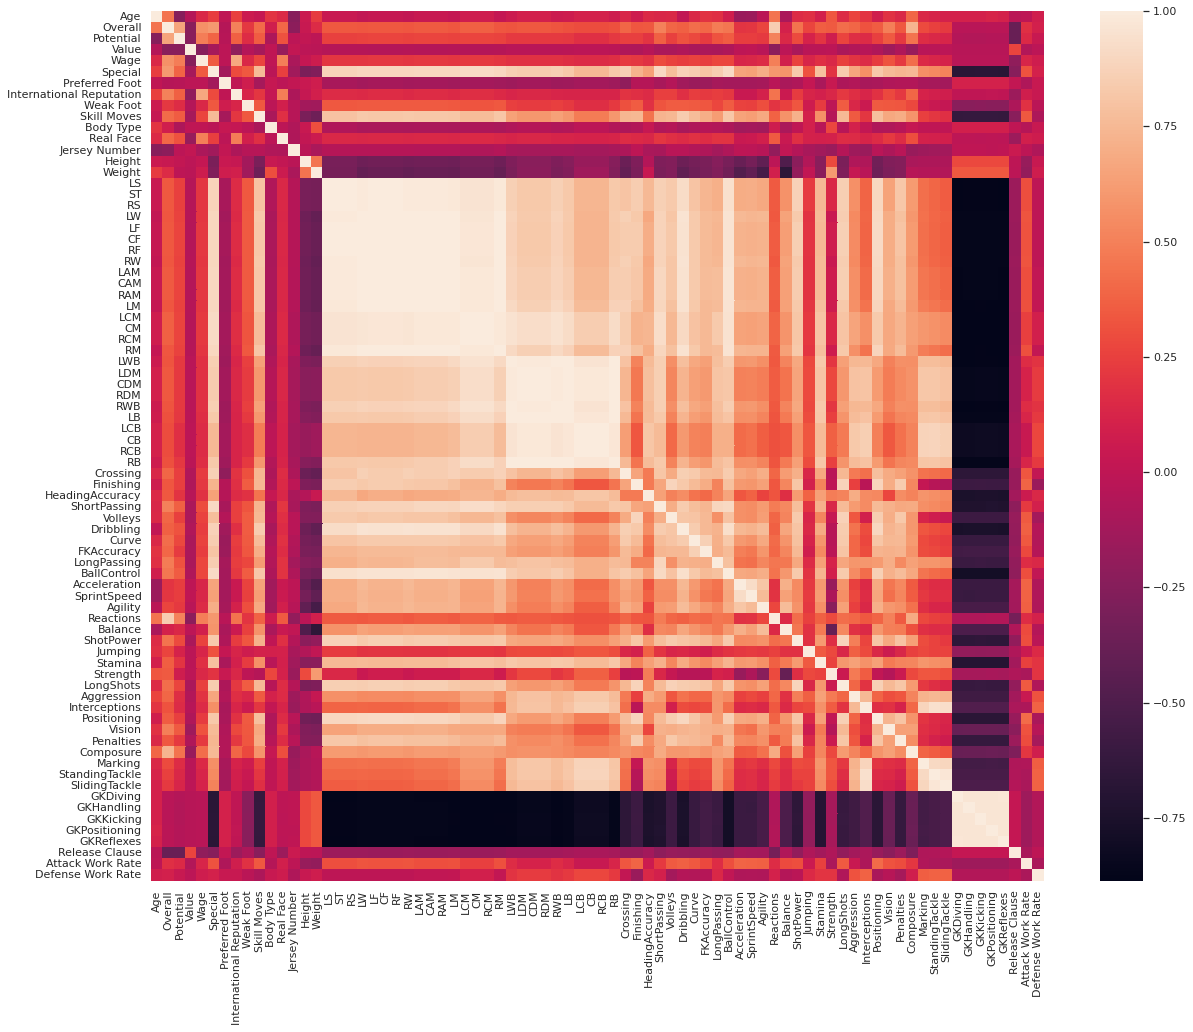

In [ ]:
corr = df_data_pro.corr()
sn.set(rc={'figure.figsize':(20,16)})
sn.heatmap(corr)

###Dropping columns having very high (absolute) correlation value

In [ ]:
# Select upper triangle of correlation matrix
upper = corr.abs().where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
# sn.heatmap(upper)
to_drop = []
# Find features with correlation greater than 0.95
for col1 in upper.columns:
    for col2 in upper.columns:
        if math.isnan(upper[col1][col2]):
            break
        if upper[col1][col2] > 0.95 and col2 not in to_drop:
            to_drop.append(col1)
            break
print('Columns to drop:',len(to_drop))
print(to_drop)

Columns to drop: 29
['ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'SlidingTackle', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']


###Plotting correlation matrix after removing highly correlated columns

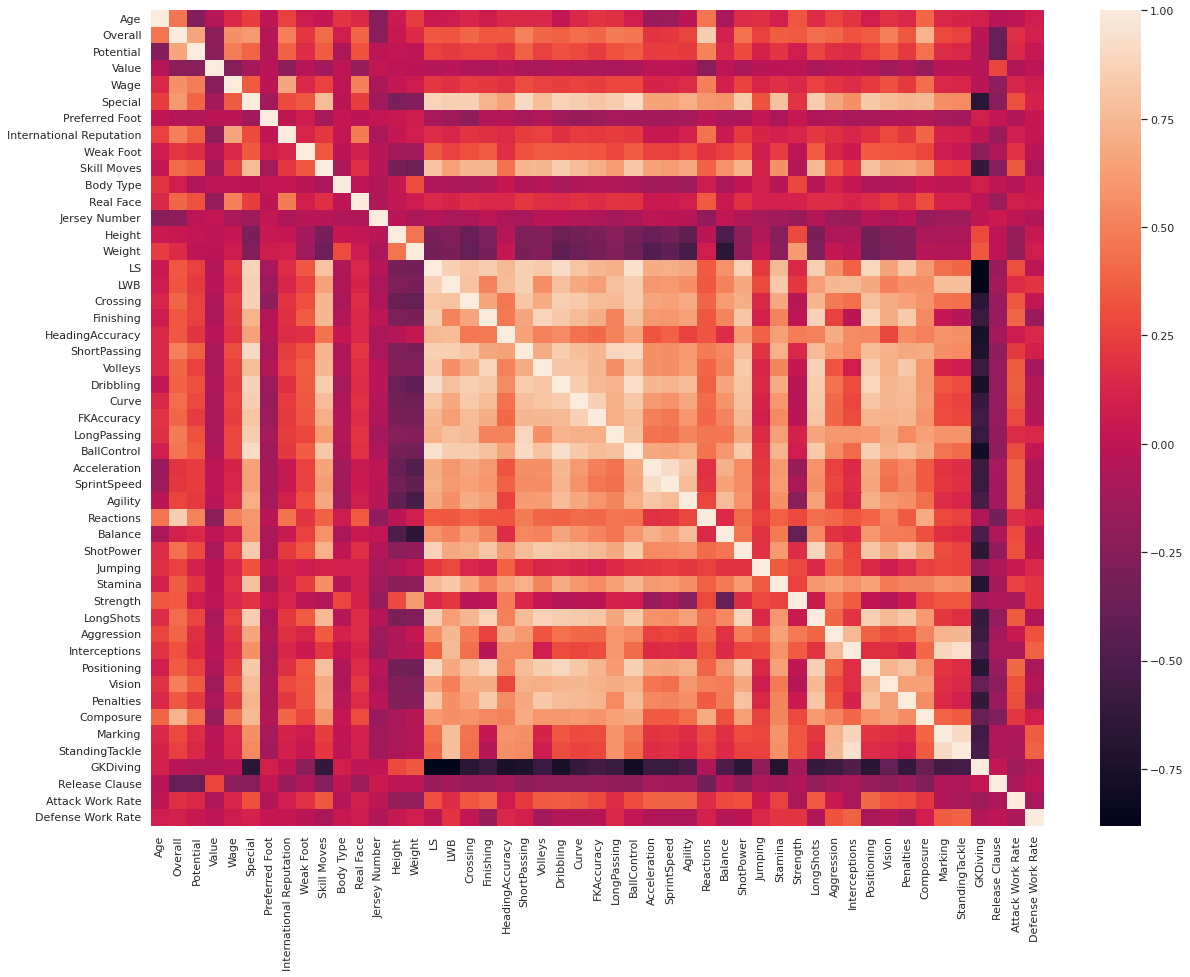

In [ ]:
df_data_noncorr = df_data_pro.drop(to_drop,axis=1)
ncorr = df_data_noncorr.corr()
sn.set(rc={'figure.figsize':(20,15)})
sn.heatmap(ncorr)

###Saving compressed data for further use

In [ ]:
df_data_noncorr_names = df_data_pro_names.drop(to_drop,axis=1)
display(df_data_noncorr_names.info())
df_data_noncorr_names.to_csv('dropped_football_data_with_names.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 50 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18147 non-null  object 
 1   Age                       18147 non-null  int64  
 2   Overall                   18147 non-null  int64  
 3   Potential                 18147 non-null  int64  
 4   Value                     18147 non-null  float64
 5   Wage                      18147 non-null  float64
 6   Special                   18147 non-null  int64  
 7   Preferred Foot            18147 non-null  int64  
 8   International Reputation  18147 non-null  float64
 9   Weak Foot                 18147 non-null  float64
 10  Skill Moves               18147 non-null  float64
 11  Body Type                 18147 non-null  int64  
 12  Real Face                 18147 non-null  int64  
 13  Jersey Number             18147 non-null  float64
 14  Height

None

###Finding outliers in the compressed data using Isolation Forest

In [ ]:
iso = IsolationForest(contamination=0.002)
yhat = iso.fit_predict(df_data_noncorr.values)
print(yhat.shape)
print(yhat)
counts = collections.Counter(yhat)
print(counts)
mask = yhat == -1
nc_outliers = df_data_noncorr_names['Name'][mask]
print(nc_outliers)

(18147,)
[-1 -1 -1 ...  1  1  1]
Counter({1: 18110, -1: 37})
0               L. Messi
1      Cristiano Ronaldo
2              Neymar Jr
4           K. De Bruyne
5              E. Hazard
6              L. Modrić
7              L. Suárez
11              T. Kroos
13           David Silva
15             P. Dybala
16               H. Kane
17          A. Griezmann
22              M. Neuer
23             S. Agüero
25             K. Mbappé
26              M. Salah
28          J. Rodríguez
29            L. Insigne
31            C. Eriksen
32              Coutinho
33         P. Aubameyang
35               Marcelo
36               G. Bale
37             H. Lloris
45              P. Pogba
47             R. Lukaku
50            D. Mertens
53            I. Rakitić
61       Roberto Firmino
79         Marco Asensio
84             R. Mahrez
97            I. Perišić
109       Z. Ibrahimović
125               H. Son
138          A. Di María
154            A. Robben
155           O. Dembélé
Name: Name, dt

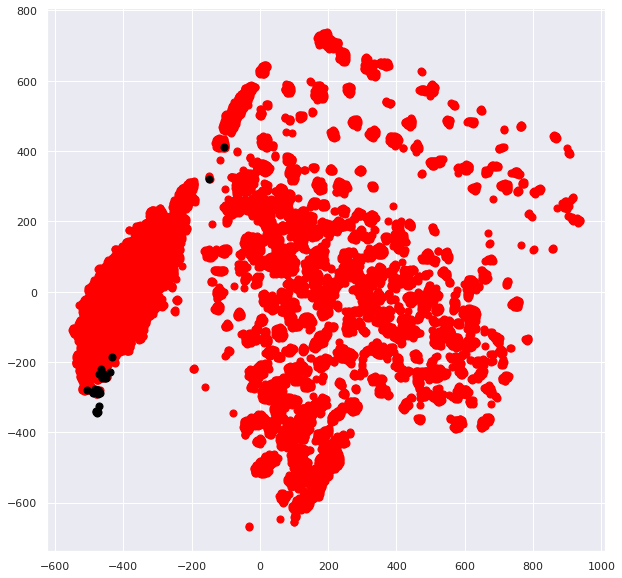

In [ ]:
tsneagg=TSNE(n_components=2, perplexity=50, init='pca', n_iter=1000, random_state=1).fit_transform(df_data_noncorr.values)
fig=plt.figure(figsize=(10,10))

plt.scatter(tsneagg[yhat==1, 0], tsneagg[yhat==1, 1], s=50, marker='o', color='red')
plt.scatter(tsneagg[yhat==-1, 0], tsneagg[yhat==-1, 1], s=50, marker='o', color='black')

###Checking difference between outliers from original data VS outliers from compressed data

In [ ]:
diff_outliers = pd.concat([outliers,nc_outliers]).drop_duplicates(keep=False)
print(diff_outliers.shape)
print(diff_outliers)

(34,)
3                 De Gea
9               J. Oblak
18         M. ter Stegen
19           T. Courtois
41             G. Buffon
57               Ederson
68               M. Reus
81               Alisson
96              A. Vidal
101        R. Nainggolan
126             A. Lopes
149        K. Schmeichel
177                 Kepa
180          J. Pickford
871             C. Bravo
2335        P. Gazzaniga
17990      E. Destanoglu
11              T. Kroos
16               H. Kane
25             K. Mbappé
26              M. Salah
29            L. Insigne
33         P. Aubameyang
47             R. Lukaku
50            D. Mertens
61       Roberto Firmino
79         Marco Asensio
84             R. Mahrez
97            I. Perišić
109       Z. Ibrahimović
125               H. Son
138          A. Di María
154            A. Robben
155           O. Dembélé
Name: Name, dtype: object
